In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def create_pie_chart(data, filter_column):
    filtered_data = data[filter_column].value_counts()
    labels = filtered_data.index
    sizes = filtered_data.values

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title(f'Pie Chart for {filter_column}')
    plt.show()



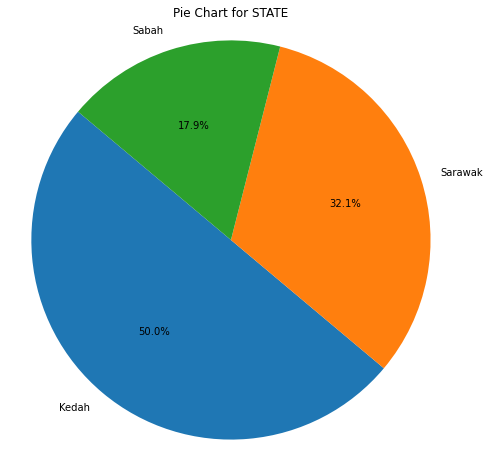

In [2]:
# Example data (you should replace this with your actual data)
data = pd.read_csv('ngee.csv')

# Choose the filter_column ('STATE', 'CITY', or 'ADDRESS')
filter_column = 'STATE'

# Create the pie chart
create_pie_chart(data, filter_column)

2023-10-27 15:35:38.418 
  command:

    streamlit run C:\Users\AIMAN\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


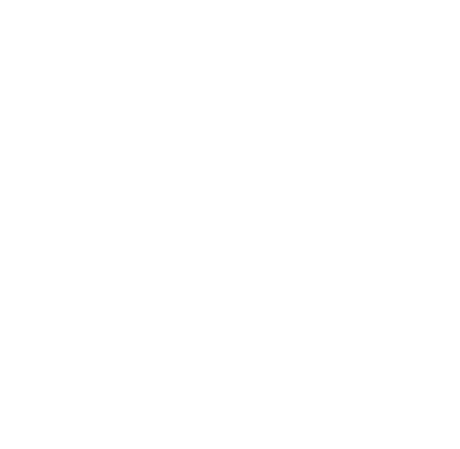

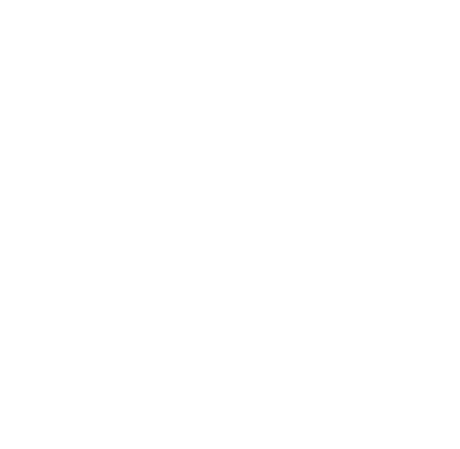

In [3]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = pd.DataFrame({
    'STATE': ['CA', 'CA', 'NY', 'NY', 'TX', 'TX'],
    'CITY': ['Los Angeles', 'San Francisco', 'New York', 'Buffalo', 'Houston', 'Dallas'],
    'ADDRESS': ['123 Main St', '456 Elm St', '789 Oak St', '101 Pine St', '222 Maple St', '333 Birch St']
})

# Streamlit app
st.title("Pie Chart Filter")

# Sidebar
state_filter = st.sidebar.selectbox("Filter by State", ['All'] + data['STATE'].unique())

# Filter data based on state selection
filtered_data = data if state_filter == 'All' else data[data['STATE'] == state_filter]

# Display overall state pie chart
st.subheader("Overall State Distribution")
state_counts = filtered_data['STATE'].value_counts()
state_pie_chart = plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
st.pyplot(state_pie_chart)

# Filter by city within the selected state
if state_filter != 'All':
    city_filter = st.sidebar.selectbox("Filter by City", ['All'] + filtered_data['CITY'].unique())
    city_filtered_data = filtered_data if city_filter == 'All' else filtered_data[filtered_data['CITY'] == city_filter]
    st.subheader(f"City Distribution in {state_filter}")
    city_counts = city_filtered_data['CITY'].value_counts()
    city_pie_chart = plt.figure(figsize=(8, 8))
    plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    st.pyplot(city_pie_chart)
